# Import used packages

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Import datasets

In [2]:
csv_path = os.path.join("..", "..", "data","LINKED_DATA", "TSR_ALL", "TSR_ALL3_MICE5.csv")
tsr_3_imp_mean = pd.read_csv(csv_path)
tsr_3_imp_mean.shape

(43759, 237)

# Convert the multiple feature and outcome into binary ones

In [3]:
mRS3 = tsr_3_imp_mean.mrs_tx_3
mRS3[(mRS3 == 0) | (mRS3 == 1) | (mRS3 == 2)] = 1 #GOOD
mRS3[(mRS3 == 3) | (mRS3 == 4) | (mRS3 == 5) | (mRS3 == 6) | (mRS3 == 9)] = 0 #BAD

mRS1 = tsr_3_imp_mean.mrs_tx_1
mRS1[(mRS1 == 0) | (mRS1 == 1) | (mRS1 == 2)] = 1 #GOOD
mRS1[(mRS1 == 3) | (mRS1 == 4) | (mRS1 == 5) | (mRS1 == 6) | (mRS1 == 9)] = 0 #BAD

discharged = tsr_3_imp_mean.discharged_mrs
discharged[(discharged == 0) | (discharged == 1) | (discharged == 2)] = 1 #GOOD
discharged[(discharged == 3) | (discharged == 4) | (discharged == 5) | (discharged == 6) | (discharged == 9)] = 0 #BAD

<ipython-input-3-767237dc0d46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mRS3[(mRS3 == 0) | (mRS3 == 1) | (mRS3 == 2)] = 1 #GOOD
<ipython-input-3-767237dc0d46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mRS3[(mRS3 == 3) | (mRS3 == 4) | (mRS3 == 5) | (mRS3 == 6) | (mRS3 == 9)] = 0 #BAD
<ipython-input-3-767237dc0d46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mRS1[(mRS1 == 0) | (mRS1 == 1) | (mRS1 == 2)] = 1 #GOOD
<ipy

# Calculate the proportion of changes

## From discharge to 1-month follow-up

In [4]:
print("GOOD remained GOOD:", len(discharged[(discharged==1) & (mRS1 == 1)]), "(",round(19504/(19504+792),3),"%)")
print("GOOD became worse into BAD:", len(discharged[(discharged==1) & (mRS1 == 0)]), "(",round(792/(19504+792),3),"%)")
print("BAD became better into GOOD:", len(discharged[(discharged==0) & (mRS1 == 1)]), "(",round(3011 /(3011 +20452),3),"%)")
print("BAD remained BAD:", len(discharged[(discharged==0) & (mRS1 == 0)]), "(",round(20452/(3011 +20452),3),"%)")

GOOD remained GOOD: 19504 ( 0.961 %)
GOOD became worse into BAD: 792 ( 0.039 %)
BAD became better into GOOD: 3011 ( 0.128 %)
BAD remained BAD: 20452 ( 0.872 %)


## From discharge to 3-month follow-up

In [5]:
print("GOOD remained GOOD:", len(discharged[(discharged==1) & (mRS3 == 1)]), "(",round(19311/(19311+985),3),"%)")
print("GOOD became worse into BAD:", len(discharged[(discharged==1) & (mRS3 == 0)]), "(",round(985/(19311+985),3),"%)")
print("BAD became better into GOOD:", len(discharged[(discharged==0) & (mRS3 == 1)]), "(",round(5313 /(5313 +18150),3),"%)")
print("BAD remained BAD:", len(discharged[(discharged==0) & (mRS3 == 0)]), "(",round(18150/(5313 +18150),3),"%)")

GOOD remained GOOD: 19311 ( 0.951 %)
GOOD became worse into BAD: 985 ( 0.049 %)
BAD became better into GOOD: 5313 ( 0.226 %)
BAD remained BAD: 18150 ( 0.774 %)


## From 1-month follow-up to 3-month follow-up

In [6]:
print("GOOD remained GOOD:", len(mRS1[(mRS1==1) & (mRS3 == 1)]), "(",round(21942/(21942+573),3),"%)")
print("GOOD became worse into BAD:", len(mRS1[(mRS1==1) & (mRS3 == 0)]), "(",round(573/(21942+573),3),"%)")
print("BAD became better into GOOD:", len(mRS1[(mRS1==0) & (mRS3 == 1)]), "(",round(2682 /(2682 +18562),3),"%)")
print("BAD remained BAD:", len(mRS1[(mRS1==0) & (mRS3 == 0)]), "(",round(18562/(2682 +18562),3),"%)")

GOOD remained GOOD: 21942 ( 0.975 %)
GOOD became worse into BAD: 573 ( 0.025 %)
BAD became better into GOOD: 2682 ( 0.126 %)
BAD remained BAD: 18562 ( 0.874 %)


# Sankey Diagram

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
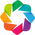

In [7]:
import holoviews as hv
hv.extension('bokeh')

## From discharged to 1-month follow-up:

In [8]:
mRS_chart_1 = [{"Discharged_mRS": "GOOD_0", "One-month_mRS": "GOOD_1", "Value": 19504},
             {"Discharged_mRS": "GOOD_0", "One-month_mRS": "BAD_1", "Value": 792},
             {"Discharged_mRS": "BAD_0", "One-month_mRS": "GOOD_1", "Value": 3011},
             {"Discharged_mRS": "BAD_0", "One-month_mRS": "BAD_1", "Value": 20452}]

mRS_chart_df_1 = pd.DataFrame(mRS_chart_1)
mRS_chart_df_1

,Discharged_mRS,One-month_mRS,Value
0,GOOD_0,GOOD_1,19504
1,GOOD_0,BAD_1,792
2,BAD_0,GOOD_1,3011
3,BAD_0,BAD_1,20452


In [9]:
mRS_1_Sanky = hv.Sankey(mRS_chart_df_1)
hv.save(mRS_1_Sanky, 'mRS_1_Sanky.png', dpi=600)
mRS_1_Sanky

:Sankey   [Discharged_mRS,One-month_mRS]   (Value)

## From discharged to 3-month follow-up:

In [10]:
mRS_chart_3 = [{"Discharged_mRS": "GOOD_0", "Three-month_mRS": "GOOD_3", "Value": 19311},
             {"Discharged_mRS": "GOOD_0", "Three-month_mRS": "BAD_3", "Value": 985},
             {"Discharged_mRS": "BAD_0", "Three-month_mRS": "GOOD_3", "Value": 5313},
             {"Discharged_mRS": "BAD_0", "Three-month_mRS": "BAD_3", "Value": 18150}]

mRS_chart_df_3 = pd.DataFrame(mRS_chart_3)
mRS_chart_df_3

,Discharged_mRS,Three-month_mRS,Value
0,GOOD_0,GOOD_3,19311
1,GOOD_0,BAD_3,985
2,BAD_0,GOOD_3,5313
3,BAD_0,BAD_3,18150


In [11]:
mRS_3_Sanky = hv.Sankey(mRS_chart_df_3)
hv.save(mRS_3_Sanky, 'mRS_3_Sanky.png', dpi=600)
mRS_3_Sanky

:Sankey   [Discharged_mRS,Three-month_mRS]   (Value)

## From discharged to 1-month follow-up then 3-month follow-up:

In [12]:
mRS_chart_1_3 = [["GOOD_0","GOOD_1"],
             ["GOOD_0", "BAD_1"],
             ["BAD_0", "GOOD_1"],
             ["BAD_0", "BAD_1"],
             ["GOOD_1", "GOOD_3"],
             ["GOOD_1", "BAD_3"],
             ["BAD_1", "GOOD_3"],
             ["BAD_1", "BAD_3"]]

mRS_chart_df_1_3 = pd.DataFrame(mRS_chart_1_3, columns=["Source", "Dest"])
mRS_chart_df_1_3["Count"] = [19504,792,3011,20452,21942,573,2682,18562]
mRS_chart_df_1_3

,Source,Dest,Count
0,GOOD_0,GOOD_1,19504
1,GOOD_0,BAD_1,792
2,BAD_0,GOOD_1,3011
3,BAD_0,BAD_1,20452
4,GOOD_1,GOOD_3,21942
5,GOOD_1,BAD_3,573
6,BAD_1,GOOD_3,2682
7,BAD_1,BAD_3,18562


In [13]:
mRS_1_3_Sanky = hv.Sankey(mRS_chart_df_1_3)
hv.save(mRS_1_3_Sanky, 'mRS_1_3_Sanky.png', dpi=600)
mRS_1_3_Sanky

:Sankey   [Source,Dest]   (Count)

# Machine learning

## Group all features and the outcome

In [14]:
nominal_features = ["edu_id", "pro_id", "opc_id", "toast_id", "offdt_id", "gender_tx", "hd_id", "pcva_id", 
                    "pcvaci_id", "pcvach_id", "po_id", "ur_id", "sm_id", "ptia_id", "hc_id", "hcht_id", 
                    "hchc_id", "ht_id", "dm_id", "pad_id", "al_id", "ca_id", "fahiid_parents_1", 
                    "fahiid_parents_2", "fahiid_parents_3", "fahiid_parents_4", "fahiid_brsi_1", 
                    "fahiid_brsi_2", "fahiid_brsi_3", "fahiid_brsi_4"]

ordinal_features = ["gcse_nm", "gcsv_nm", "gcsm_nm", "discharged_mrs", "feeding", "transfers", 
                    "bathing", "toilet_use", "grooming", "mobility", "stairs", "dressing", "bowel_control", 
                    "bladder_control", "nihs_1a_in", "nihs_1b_in", "nihs_1c_in", "nihs_2_in", "nihs_3_in", "nihs_4_in", 
                    "nihs_5al_in", "nihs_5br_in", "nihs_6al_in", "nihs_6br_in", "nihs_7_in", "nihs_8_in", "nihs_9_in", 
                    "nihs_10_in", "nihs_11_in", "nihs_1a_out", "nihs_1b_out", "nihs_1c_out", "nihs_2_out", "nihs_3_out", 
                    "nihs_4_out", "nihs_5al_out", "nihs_5br_out", "nihs_6al_out", "nihs_6br_out", "nihs_7_out", 
                    "nihs_8_out", "nihs_9_out", "nihs_10_out", "nihs_11_out"]

boolean = ["toastle_fl", "toastli_fl", "toastsce_fl", "toastsmo_fl", "toastsra_fl", "toastsdi_fl", 
           "toastsmi_fl", "toastsantip_fl", "toastsau_fl", "toastshy_fl", "toastspr_fl", "toastsantit_fl",
           "toastsho_fl", "toastshys_fl", "toastsca_fl", "thda_fl", "thdh_fl", "thdi_fl", "thdam_fl", "thdv_fl",
           "thde_fl", "thdm_fl", "thdr_fl", "thdp_fl", "trman_fl", "trmas_fl", "trmti_fl", "trmhe_fl", 
           "trmwa_fl", "trmia_fl", "trmfo_fl", "trmta_fl", "trmsd_fl", "trmre_fl", "trmen_fl", "trmag_fl", 
           "trmcl_fl", "trmpl_fl", "trmlm_fl", "trmiv_fl", "trmve_fl", "trmng_fl", "trmdy_fl", "trmicu_fl", 
           "trmsm_fl", "trmed_fl", "trmop_fl", "om_fl", "omas_fl", "omag_fl", "omti_fl", "omcl_fl", "omwa_fl",
           "ompl_fl", "omanh_fl", "omand_fl", "omli_fl", "am_fl", "amas_fl", "amag_fl", "amti_fl", "amcl_fl", 
           "amwa_fl", "ampl_fl", "amanh_fl", "amand_fl", "amli_fl", "compn_fl", "comut_fl", "comug_fl", 
           "compr_fl", "compu_fl", "comac_fl", "comse_fl", "comde_fl", "detst_fl", "dethe_fl", "detho_fl", 
           "detha_fl", "detva_fl", "detre_fl", "detme_fl", "ct_fl", "mri_fl", "ecgl_fl", "ecga_fl", "ecgq_fl",
           "cortical_aca_ctr", "cortical_mca_ctr", "subcortical_aca_ctr", "subcortical_mca_ctr", "pca_cortex_ctr",
           "thalamus_ctr", "brainstem_ctr", "cerebellum_ctr", "watershed_ctr", "hemorrhagic_infarct_ctr",
           "old_stroke_ctci", "cortical_aca_ctl", "cortical_mca_ctl", "subcortical_aca_ctl", "subcortical_mca_ctl",
           "pca_cortex_ctl", "thalamus_ctl", "brainstem_ctl", "cerebellum_ctl", "watershed_ctl",
           "hemorrhagic_infarct_ctl", "old_stroke_ctch", "cortical_aca_mrir", "cortical_mca_mrir", 
           "subcortical_aca_mrir", "subcortical_mca_mrir", "pca_cortex_mrir", "thalamus_mrir", "brainstem_mrir",
           "cerebellum_mrir", "watershed_mrir", "hemorrhagic_infarct_mrir", "old_stroke_mrici", "cortical_aca_mril", 
           "cortical_mca_mril", "subcortical_aca_mril", "subcortical_mca_mril", "pca_cortex_mril", 
           "thalamus_mril", "brainstem_mril", "cerebellum_mril", "watershed_mril", "hemorrhagic_infarct_mril", 
           "old_stroke_mrich"]

continuous = ["height_nm", "weight_nm", "sbp_nm", "dbp_nm", "bt_nm", "hr_nm", "rr_nm", "hb_nm",
              "hct_nm", "platelet_nm", "wbc_nm", "ptt1_nm", "ptt2_nm", "ptinr_nm", "er_nm", "bun_nm", 
              "cre_nm", "alb_nm", "crp_nm", "hbac_nm", "ac_nm", "ua_nm", "tcho_nm", "tg_nm", "hdl_nm", 
              "ldl_nm", "got_nm", "gpt_nm", "age", "hospitalised_time"]

labels = ["mrs_tx_3", "mrs_tx_1"]

## Indices of each group

In [15]:
nominal_ix = [tsr_3_imp_mean.columns.get_loc(col) for col in nominal_features]
continuous_ix = [tsr_3_imp_mean.columns.get_loc(col) for col in continuous]
ordinal_ix = [tsr_3_imp_mean.columns.get_loc(col) for col in ordinal_features]
boolean_ix = [tsr_3_imp_mean.columns.get_loc(col) for col in boolean]

# Correlation of mRS from Discharge (GOOD) to 3-month (GOOD/BAD)

In [16]:
fromGto3m = tsr_3_imp_mean[(tsr_3_imp_mean.discharged_mrs == 1)]
print("The shape of mRS from Discharge (GOOD) to 3-month (GOOD/BAD):", fromGto3m.shape)

The shape of mRS from Discharge (GOOD) to 3-month (GOOD/BAD): (20296, 237)


## Continuous Features

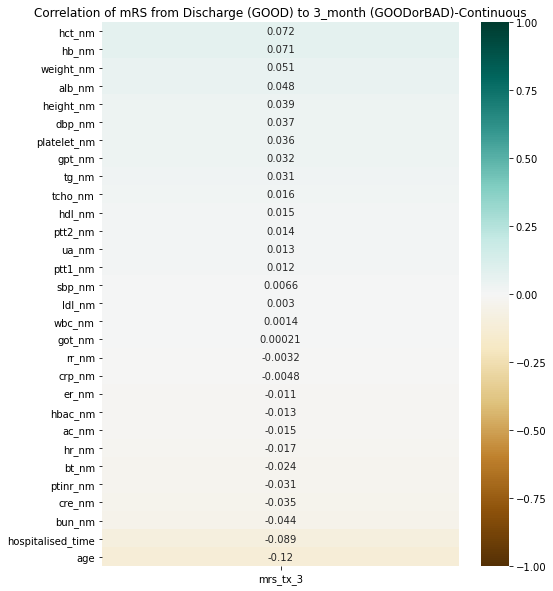

In [17]:
from scipy.stats import pointbiserialr

correlation_continuous = []
for  i in continuous:
    correlation = pointbiserialr(fromGto3m.mrs_tx_3, fromGto3m[i])[0]
    correlation_continuous.append(correlation)

corr_cont = pd.DataFrame([continuous, correlation_continuous]).T
corr_cont.columns = ["", "mrs_tx_3"]
corr_cont = corr_cont.sort_values(by='mrs_tx_3', ascending=False).T
corr_cont.columns = corr_cont.iloc[0]
corr_cont = corr_cont.drop(corr_cont.index[0])
corr_cont = corr_cont.astype("float")

plt.figure(figsize=(8, 10))
sns.heatmap(corr_cont.T, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (GOOD) to 3_month (GOODorBAD)-Continuous')
plt.savefig('Correlation of mRS from Discharge (GOOD) to 3_month (GOODorBAD)-Continuous.png')
plt.show()

## Categorical Features

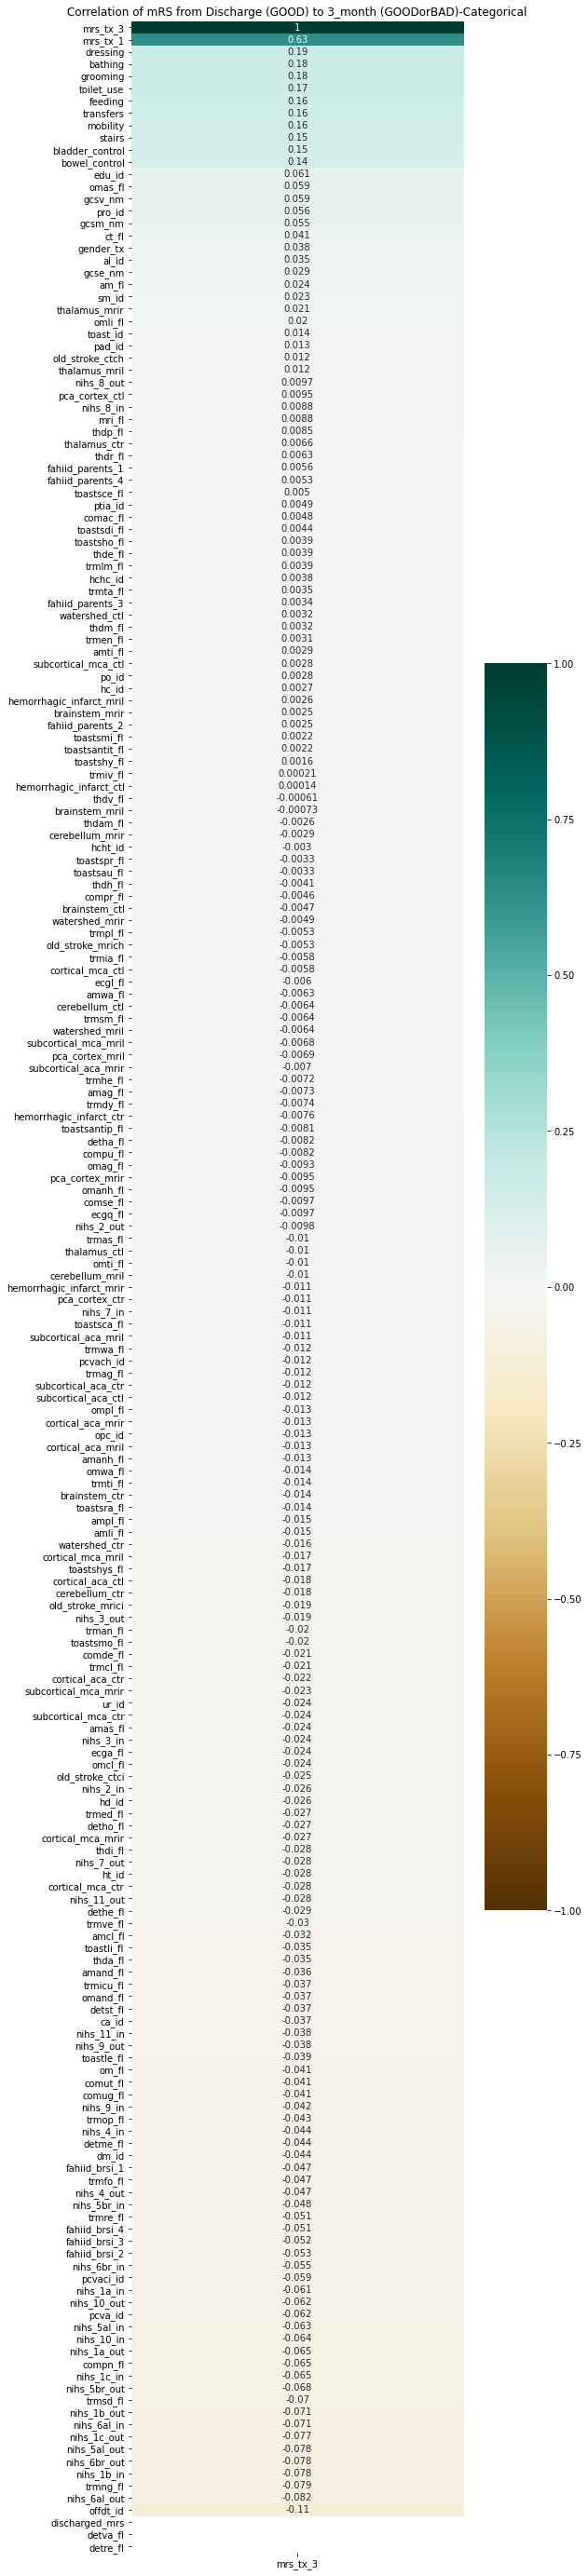

In [18]:
plt.figure(figsize=(8, 50))
sns.heatmap(fromGto3m[(nominal_features+ordinal_features+boolean+ labels)].corr(method= "kendall")[['mrs_tx_3']].sort_values(by='mrs_tx_3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (GOOD) to 3_month (GOODorBAD)-Categorical')
plt.savefig('Correlation of mRS from Discharge (GOOD) to 3_month (GOODorBAD)-Categorical.png')
plt.show()

# Correlation of mRS from Discharge (BAD) to 3-month (GOOD/BAD)

In [19]:
fromBto3m = tsr_3_imp_mean[(tsr_3_imp_mean.discharged_mrs == 0)]
print("The shape of mRS from Discharge (BAD) to 3-month (GOOD/BAD):", fromBto3m.shape)

The shape of mRS from Discharge (BAD) to 3-month (GOOD/BAD): (23463, 237)


## Continuous Features

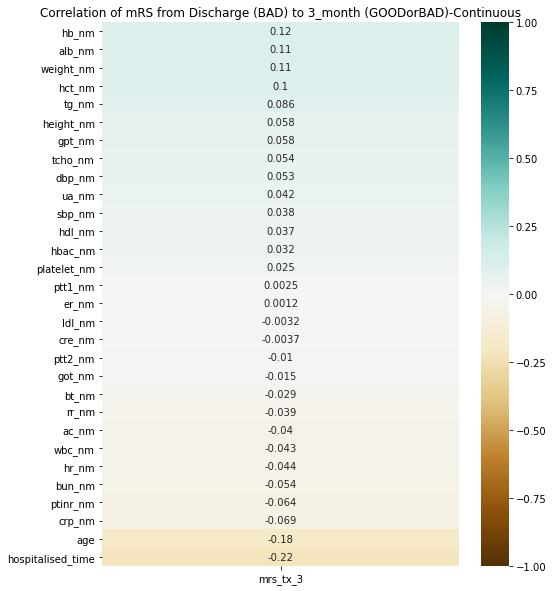

In [20]:
from scipy.stats import pointbiserialr

correlation_continuous = []
for  i in continuous:
    correlation = pointbiserialr(fromBto3m.mrs_tx_3, fromBto3m[i])[0]
    correlation_continuous.append(correlation)

corr_cont = pd.DataFrame([continuous, correlation_continuous]).T
corr_cont.columns = ["", "mrs_tx_3"]
corr_cont = corr_cont.sort_values(by='mrs_tx_3', ascending=False).T
corr_cont.columns = corr_cont.iloc[0]
corr_cont = corr_cont.drop(corr_cont.index[0])
corr_cont = corr_cont.astype("float")

plt.figure(figsize=(8, 10))
sns.heatmap(corr_cont.T, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (BAD) to 3_month (GOODorBAD)-Continuous')
plt.savefig('Correlation of mRS from Discharge (BAD) to 3_month (GOODorBAD)-Continuous.png')
plt.show()

## Categorical Features

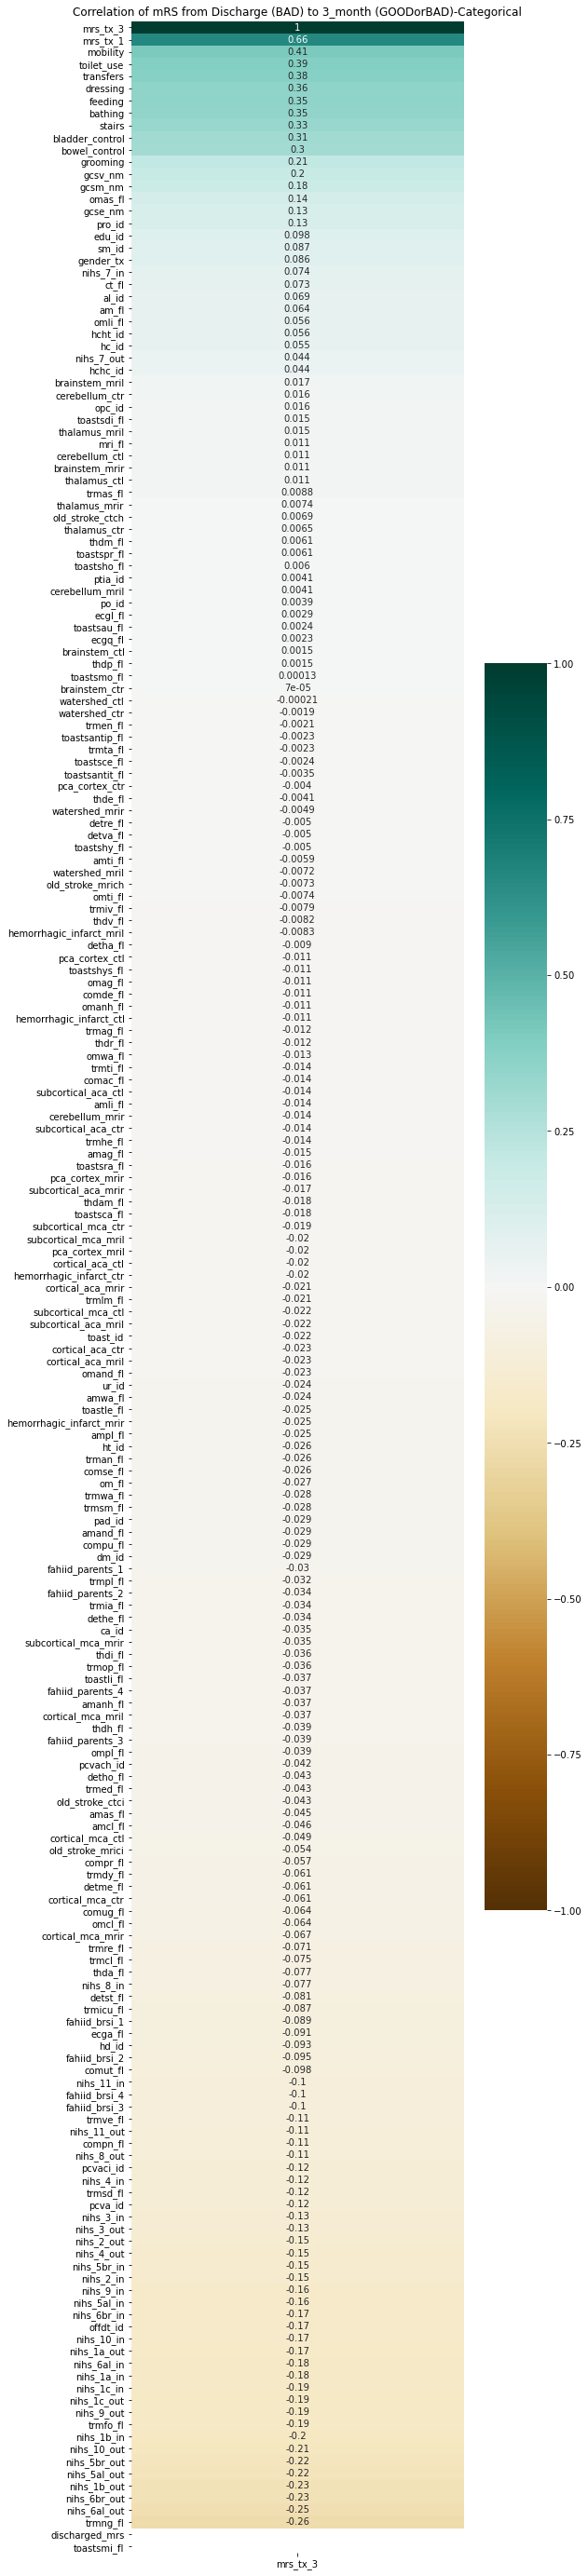

In [24]:
plt.figure(figsize=(8, 50))
sns.heatmap(fromBto3m[(nominal_features+ordinal_features+boolean+ labels)].corr(method= "kendall")[['mrs_tx_3']].sort_values(by='mrs_tx_3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation of mRS from Discharge (BAD) to 3_month (GOODorBAD)-Categorical')
plt.savefig('Correlation of mRS from Discharge (BAD) to 3_month (GOODorBAD)-Categorical.png')
plt.show()

# Preprocess input data (GOOD when Discharge)

In [16]:
#discharged mRS = GOOD (tsr_3_imp_mean.discharged_mrs == 1)
mrs_dis1 = tsr_3_imp_mean[tsr_3_imp_mean.discharged_mrs == 1]
mrs_dis1.shape

(20296, 237)

In [17]:
tsr_3G_input = mrs_dis1.drop(["mrs_tx_1", "mrs_tx_3"], axis=1)
print(tsr_3G_input.shape)
#tsr_3G_input[tsr_3G_input == "N"] = 0
#tsr_3G_input[tsr_3G_input == "Y"] = 1
tsr_3G_input = tsr_3G_input.astype("float64")
tsr_3G_input = np.array(tsr_3G_input.values)

(20296, 235)


In [18]:
tsr_3G_output = mrs_dis1.mrs_tx_3
print(tsr_3G_output.shape)
#tsr_3G_output[(tsr_3G_output == 0) | (tsr_3G_output == 1) | (tsr_3G_output == 2)] = 0 #GOOD
#tsr_3G_output[(tsr_3G_output == 3) | (tsr_3G_output == 4) | (tsr_3G_output == 5) | (tsr_3G_output == 6) | (tsr_3G_output == 9)] = 1 #BAD
tsr_3G_output = tsr_3G_output.astype("float64")
tsr_3G_output = np.array(tsr_3G_output.values)

(20296,)


In [19]:
G_X_train, G_X_test, G_y_train, G_y_test = train_test_split(tsr_3G_input, tsr_3G_output, test_size=0.3, random_state=19)
print("The shape of GOOD's X_train:",G_X_train.shape)
print("The shape of GOOD's y_train:",G_y_train.shape)
print("The shape of GOOD's X_test:",G_X_test.shape)
print("The shape of GOOD's y_test:",G_y_test.shape)

The shape of GOOD's X_train: (14207, 235)
The shape of GOOD's y_train: (14207,)
The shape of GOOD's X_test: (6089, 235)
The shape of GOOD's y_test: (6089,)


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

G_X_train = pd.DataFrame(G_X_train)
G_X_train.columns = tsr_3_imp_mean.drop(["mrs_tx_1", "mrs_tx_3"], axis=1).columns

scaler = MinMaxScaler()
G_X_train[continuous] = scaler.fit_transform(G_X_train[continuous])

encoder = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = 6)
G_X_train[ordinal_features] = encoder.fit_transform(G_X_train[ordinal_features])

ohe = OneHotEncoder(sparse = False)
nominal_train = ohe.fit_transform(G_X_train[nominal_features])
G_X_train = pd.concat([G_X_train, pd.DataFrame(nominal_train)], axis=1)
G_X_train = G_X_train.drop(nominal_features, axis=1)

#G_X_train = pd.get_dummies(G_X_train, columns=nominal_features)

G_X_train = np.array(G_X_train.values)

In [21]:
G_X_test = pd.DataFrame(G_X_test)

G_X_test.columns = tsr_3_imp_mean.drop(["mrs_tx_1", "mrs_tx_3"], axis=1).columns

G_X_test[continuous] = scaler.transform(G_X_test[continuous])

G_X_test[ordinal_features] = encoder.transform(G_X_test[ordinal_features])

nominal_test = ohe.transform(G_X_test[nominal_features])
G_X_test = pd.concat([G_X_test, pd.DataFrame(nominal_test)], axis=1)
G_X_test = G_X_test.drop(nominal_features, axis=1)

#G_X_test = pd.get_dummies(G_X_test, columns=nominal_features)

G_X_test = np.array(G_X_test.values)

## Oversampling

In [61]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(G_y_train))

smote = SMOTE(sampling_strategy ='minority', random_state = 19) #oversampling
G_X_train_smote, G_y_train_smote = smote.fit_resample(G_X_train, G_y_train)

print('Resampled dataset shape %s' % Counter(G_y_train_smote))

Original dataset shape Counter({1.0: 13527, 0.0: 680})
Resampled dataset shape Counter({1.0: 13527, 0.0: 13527})


## Undersampling

In [123]:
#Method 1 - RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(G_y_train))

rus = RandomUnderSampler(sampling_strategy ='majority', random_state = 19) #oversampling
G_X_train_rus, G_y_train_rus = rus.fit_resample(G_X_train, G_y_train)

print('Resampled dataset shape %s' % Counter(G_y_train_rus))

Original dataset shape Counter({1.0: 13527, 0.0: 680})
Resampled dataset shape Counter({0.0: 680, 1.0: 680})


In [22]:
#Method 2 - TomekLinks
from collections import Counter
from imblearn.under_sampling import TomekLinks

print('Original dataset shape %s' % Counter(G_y_train))

tl = TomekLinks()
G_X_train_tl, G_y_train_tl = tl.fit_resample(G_X_train, G_y_train)

print('Resampled dataset shape %s' % Counter(G_y_train_tl))

Original dataset shape Counter({1.0: 13527, 0.0: 680})
Resampled dataset shape Counter({1.0: 13446, 0.0: 680})


## Algorithms

In [27]:
rf = RandomForestClassifier(random_state=19, class_weight = {0 : (680/680+13446), 1 : (13446/680+13446)}) #when using tl
#rf = RandomForestClassifier(random_state=19)
rf.fit(G_X_train_tl, G_y_train_tl)
print("AUC of training set:", roc_auc_score(G_y_train_tl, rf.predict(G_X_train_tl)))
G_y_predicted = rf.predict(G_X_test)
print("AUC of testing set:",roc_auc_score(G_y_test, G_y_predicted))
confusion_matrix(G_y_test, G_y_predicted)

AUC of training set: 0.9992647058823529
AUC of testing set: 0.522691483572546


array([[  14,  291],
       [   3, 5781]])

In [28]:
svc = SVC(random_state=19, class_weight = {0 : (680/680+13446), 1 : (13446/680+13446)}) #when using tl
#svc = SVC(random_state=19)
svc.fit(G_X_train_tl, G_y_train_tl)
print("AUC of training set:", roc_auc_score(G_y_train_tl, svc.predict(G_X_train_tl)))
G_y_predicted = svc.predict(G_X_test)
print("AUC of testing set:",roc_auc_score(G_y_test, G_y_predicted))
confusion_matrix(G_y_test, G_y_predicted)

AUC of training set: 0.9992647058823529
AUC of testing set: 0.5671850554384055


array([[  50,  255],
       [ 171, 5613]])

In [29]:
lsvc = LinearSVC(random_state=19, class_weight = {0 : (680/680+13446), 1 : (13446/680+13446)}) #when using tl
#lsvc = LinearSVC(random_state=19)
lsvc.fit(G_X_train_tl, G_y_train_tl)
print("AUC of training set:", roc_auc_score(G_y_train_tl, lsvc.predict(G_X_train_tl)))
G_y_predicted = lsvc.predict(G_X_test)
print("AUC of testing set:",roc_auc_score(G_y_test, G_y_predicted))
confusion_matrix(G_y_test, G_y_predicted)

AUC of training set: 0.5633131655160949
AUC of testing set: 0.5395109176246514


/anaconda3/envs/tsr_ml/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[  26,  279],
       [  36, 5748]])

In [30]:
xgbc = XGBClassifier(random_state=19, use_label_encoder=False, eval_metric = "auc", scale_pos_weight = (680 / 13445)) #when using tl
#xgbc = XGBClassifier(random_state=19, use_label_encoder=False, eval_metric = "auc")
xgbc.fit(G_X_train_tl, G_y_train_tl)
print("AUC of training set:", roc_auc_score(G_y_train_tl, xgbc.predict(G_X_train_tl)))
G_y_predicted = xgbc.predict(G_X_test)
print("AUC of testing set:",roc_auc_score(G_y_test, G_y_predicted))
confusion_matrix(G_y_test, G_y_predicted)

AUC of training set: 0.9942362040755615
AUC of testing set: 0.593754109697753


array([[  68,  237],
       [ 205, 5579]])

# Preprocess input data (BAD when Discharge)

In [4]:
#discharged mRS = BAD (tsr_3_imp_mean.discharged_mrs == 0)
mrs_dis0 = tsr_3_imp_mean[tsr_3_imp_mean.discharged_mrs == 0]
mrs_dis0.shape

(23463, 237)

In [5]:
tsr_3B_input = mrs_dis0.drop(["mrs_tx_1", "mrs_tx_3"], axis=1)
print(tsr_3B_input.shape)
#tsr_3B_input[tsr_3B_input == "N"] = 0
#tsr_3B_input[tsr_3B_input == "Y"] = 1
tsr_3B_input = tsr_3B_input.astype("float64")
tsr_3B_input = np.array(tsr_3B_input.values)

(23463, 235)


In [6]:
tsr_3B_output = mrs_dis0.mrs_tx_3
print(tsr_3B_output.shape)
#tsr_3B_output[(tsr_3B_output == 0) | (tsr_3B_output == 1) | (tsr_3B_output == 2)] = 0 #GOOD
#tsr_3B_output[(tsr_3B_output == 3) | (tsr_3B_output == 4) | (tsr_3B_output == 5) | (tsr_3B_output == 6) | (tsr_3B_output == 9)] = 1 #BAD
tsr_3B_output = tsr_3B_output.astype("float64")
tsr_3B_output = np.array(tsr_3B_output.values)

(23463,)


In [7]:
B_X_train, B_X_test, B_y_train, B_y_test = train_test_split(tsr_3B_input, tsr_3B_output, test_size=0.3, random_state=19)
print("The shape of X_train:",B_X_train.shape)
print("The shape of y_train:",B_y_train.shape)
print("The shape of X_test:",B_X_test.shape)
print("The shape of y_test:",B_y_test.shape)

The shape of X_train: (16424, 235)
The shape of y_train: (16424,)
The shape of X_test: (7039, 235)
The shape of y_test: (7039,)


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

B_X_train = pd.DataFrame(B_X_train)
B_X_train.columns = tsr_3_imp_mean.drop(["mrs_tx_1", "mrs_tx_3"], axis=1).columns

scaler = MinMaxScaler()
B_X_train[continuous] = scaler.fit_transform(B_X_train[continuous])

encoder = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = 9)
B_X_train[ordinal_features] = encoder.fit_transform(B_X_train[ordinal_features])

ohe = OneHotEncoder(sparse = False)
nominal_train = ohe.fit_transform(B_X_train[nominal_features])
B_X_train = pd.concat([B_X_train, pd.DataFrame(nominal_train)], axis=1)
B_X_train = B_X_train.drop(nominal_features, axis=1)

#B_X_train = pd.get_dummies(B_X_train, columns=nominal_features)

#B_X_train = np.array(B_X_train.values)

In [13]:
B_X_test = pd.DataFrame(B_X_test)

B_X_test.columns = tsr_3_imp_mean.drop(["mrs_tx_1", "mrs_tx_3"], axis=1).columns

B_X_test[continuous] = scaler.transform(B_X_test[continuous])

B_X_test[ordinal_features] = encoder.transform(B_X_test[ordinal_features])

nominal_test = ohe.transform(B_X_test[nominal_features])
B_X_test = pd.concat([B_X_test, pd.DataFrame(nominal_test)], axis=1)
B_X_test = B_X_test.drop(nominal_features, axis=1)

#B_X_test = pd.get_dummies(B_X_test, columns=nominal_features)

#B_X_test = np.array(B_X_test.values)

## Oversampling

In [685]:
print('Original dataset shape %s' % Counter(B_y_train))

smote = SMOTE(sampling_strategy ='minority', random_state = 19) #oversampling
B_X_train_smote, B_y_train_smote = smote.fit_resample(B_X_train, B_y_train)

print('Resampled dataset shape %s' % Counter(B_y_train_smote))

Original dataset shape Counter({0.0: 12710, 1.0: 3714})
Resampled dataset shape Counter({1.0: 12710, 0.0: 12710})


## Undersampling

In [698]:
#Method 1 - RandomUnderSampler
print('Original dataset shape %s' % Counter(B_y_train))

rus = RandomUnderSampler(sampling_strategy ='majority', random_state = 19) #oversampling
B_X_train_rus, B_y_train_rus = rus.fit_resample(B_X_train, B_y_train)

print('Resampled dataset shape %s' % Counter(B_y_train_rus))

Original dataset shape Counter({0.0: 12710, 1.0: 3714})
Resampled dataset shape Counter({0.0: 3714, 1.0: 3714})


In [15]:
#Method 2 - TomekLinks
from collections import Counter
from imblearn.under_sampling import TomekLinks

print('Original dataset shape %s' % Counter(B_y_train))

tl = TomekLinks()
B_X_train_tl, B_y_train_tl = tl.fit_resample(B_X_train, B_y_train)

print('Resampled dataset shape %s' % Counter(B_y_train_tl))

Original dataset shape Counter({0.0: 12710, 1.0: 3714})
Resampled dataset shape Counter({0.0: 12291, 1.0: 3714})


## Algorithms

In [44]:
rf = RandomForestClassifier(random_state=19, class_weight = {0 : (680/680+13446), 1 : (13446/680+13446)}) #when using tl
#rf = RandomForestClassifier(random_state=19)
rf.fit(B_X_train_tl, B_y_train_tl)
print("AUC of training set:", roc_auc_score(B_y_train_tl, rf.predict(B_X_train_tl)))
B_y_predicted = rf.predict(B_X_test)
print("AUC of testing set:",roc_auc_score(B_y_test, B_y_predicted))
confusion_matrix(B_y_test, B_y_predicted)

AUC of training set: 1.0
AUC of testing set: 0.6517308037192363


array([[5121,  319],
       [1020,  579]])

In [20]:
from sklearn.model_selection import GridSearchCV
hyperparameters_rf={"n_estimators": [50, 100],
                   "criterion": ["gini", "entropy"],
                   "max_depth": [None, 10],
                   "min_samples_split": [2, 100],
                   "max_features": ["auto", "sqrt", "log2"],
                   "bootstrap": [True, False],
                   "class_weight": ['balanced', {0 : 680, 1 : 13445}, {0 : 13445, 1 : 680}],
                   "max_samples": [100, 0.7],
                   "random_state": [19]}

rf_gscv = GridSearchCV(estimator = RandomForestClassifier(),
                   param_grid = hyperparameters_rf,
                   n_jobs=3,
                   scoring='roc_auc',
                   verbose=2,
                   cv=10)

rf_gsCV = rf_gscv.fit(B_X_train_tl, B_y_train_tl)
print('--> Tuned Parameters Best Score: ',rf_gsCV.best_score_)
print('--> Best Parameters: \n',rf_gsCV.best_params_)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
--> Tuned Parameters Best Score:  0.8741032008877779
--> Best Parameters: 
 {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_samples': 100, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 19}


In [237]:
best_rf = RandomForestClassifier(bootstrap = False, 
                            class_weight = "balanced",
                            criterion = "entropy", 
                            max_depth = None,  
                            max_features = "auto",
                            max_samples = 100, 
                            min_samples_split = 2, 
                            n_estimators = 100, 
                            random_state=19)
best_rf.fit(B_X_train_tl, B_y_train_tl)
print("AUC of training set:", roc_auc_score(B_y_train_tl, best_rf.predict(B_X_train_tl)))
B_y_predicted = best_rf.predict(B_X_test)
print("AUC of testing set:",roc_auc_score(B_y_test, B_y_predicted))
confusion_matrix(B_y_test, B_y_predicted)

AUC of training set: 1.0
AUC of testing set: 0.7831283568774601


array([[3982, 1458],
       [ 265, 1334]])

In [19]:
svc = SVC(random_state=19, class_weight = {0 : (680/680+13446), 1 : (13446/680+13446)}) #when using tl
#svc = SVC(random_state=19)
svc.fit(B_X_train_tl, B_y_train_tl)
print("AUC of training set:", roc_auc_score(B_y_train_tl, svc.predict(B_X_train_tl)))
B_y_predicted = svc.predict(B_X_test)
print("AUC of testing set:",roc_auc_score(B_y_test, B_y_predicted))
confusion_matrix(B_y_test, B_y_predicted)

AUC of training set: 1.0
AUC of testing set: 0.6948901887208918


array([[4672,  768],
       [ 750,  849]])

In [108]:
param_range = [0.01, 0.1, 1, 10, 100]   

hyperparameters_svc=[{'kernel': ['rbf', 'linear'], 'gamma': ['auto', 'scale', param_range],  'C': param_range, 'shrinking' : [True, False], 'decision_function_shape':['ovo', 'ovr'],'random_state': [19]},
                                {'kernel': ['sigmoid'], 'gamma': ['auto', 'scale', param_range], 'C': param_range, 'shrinking' : [True, False],'coef0': param_range, 'decision_function_shape':['ovo', 'ovr'],'random_state': [19]}]


svc_gscv = GridSearchCV(estimator = SVC(),
                        param_grid = hyperparameters_svc,
                        n_jobs=3,
                        scoring='roc_auc',
                        verbose=2,
                        cv=10)

svc_gsCV = svc_gscv.fit(B_X_train_tl, B_y_train_tl)
print('--> Tuned Parameters Best Score: ',svc_gsCV.best_score_)
print('--> Best Parameters: \n',svc_gsCV.best_params_)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


/anaconda3/envs/tsr_ml/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.8240419  0.82404624 0.84817967 0.84817894 0.82467027 0.82467027
 0.84817967 0.84817894        nan        nan        nan        nan
 0.8240419  0.82404624 0.84817967 0.84817894 0.82467027 0.82467027
 0.84817967 0.84817894        nan        nan        nan        nan
 0.83707822 0.83707532 0.84852826 0.84853406 0.84104596 0.84104596
 0.84852826 0.84853406        nan        nan        nan        nan
 0.83707822 0.83707532 0.84852826 0.84853406 0.84104596 0.84104596
 0.84852826 0.84853406        nan        nan        nan        nan
 0.85061551 0.85061551 0.84569538 0.84566924 0.85296561 0.85296561
 0.84569538 0.84566924        nan        nan        nan        nan
 0.85061551 0.85061551 0.84569538 0.84566924 0.85296561 0.85296561
 0.84569538 0.84566924        nan        nan        nan        nan
 0.85345057 0.85344912 0.84470623 0.84468012 

--> Tuned Parameters Best Score:  0.8534505730311508
--> Best Parameters: 
 {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 19, 'shrinking': True}


In [239]:
best_svc  = SVC(C = 10,
                        decision_function_shape = "ovo",
                        gamma = "auto",
                        kernel = "rbf",
                        random_state = 19,
                        shrinking = True,
                        probability = True)
best_svc.fit(B_X_train_tl, B_y_train_tl)
print("AUC of training set:", roc_auc_score(B_y_train_tl, best_svc.predict(B_X_train_tl)))
B_y_predicted = best_svc.predict(B_X_test)
print("AUC of testing set:",roc_auc_score(B_y_test, B_y_predicted))
confusion_matrix(B_y_test, B_y_predicted)

AUC of training set: 0.8274098007539041
AUC of testing set: 0.7820152416032079


array([[3827, 1613],
       [ 223, 1376]])

In [16]:
lsvc = LinearSVC(random_state=19, class_weight = {0 : (680/680+13446), 1 : (13446/680+13446)}) #when using tl
#lsvc = LinearSVC(random_state=19)
lsvc.fit(B_X_train_tl, B_y_train_tl)
print("AUC of training set:", roc_auc_score(B_y_train_tl, lsvc.predict(B_X_train_tl)))
B_y_predicted = lsvc.predict(B_X_test)
print("AUC of testing set:",roc_auc_score(B_y_test, B_y_predicted))
confusion_matrix(B_y_test, B_y_predicted)

AUC of training set: 0.7394205263869736
AUC of testing set: 0.7281414395026302


/anaconda3/envs/tsr_ml/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[2836, 2604],
       [ 104, 1495]])

In [17]:
xgbc = XGBClassifier(random_state=19, use_label_encoder=False, eval_metric = "auc", scale_pos_weight = (680 / 13445)) #when using tl
#xgbc = XGBClassifier(random_state=19, use_label_encoder=False, eval_metric = "auc")
xgbc.fit(B_X_train_tl, B_y_train_tl)
print("AUC of training set:", roc_auc_score(B_y_train_tl, xgbc.predict(B_X_train_tl)))
B_y_predicted = xgbc.predict(B_X_test)
print("AUC of testing set:",roc_auc_score(B_y_test, B_y_predicted))
confusion_matrix(B_y_test, B_y_predicted)

AUC of training set: 0.589122240172321
AUC of testing set: 0.5427673086120002


array([[5412,   28],
       [1454,  145]])